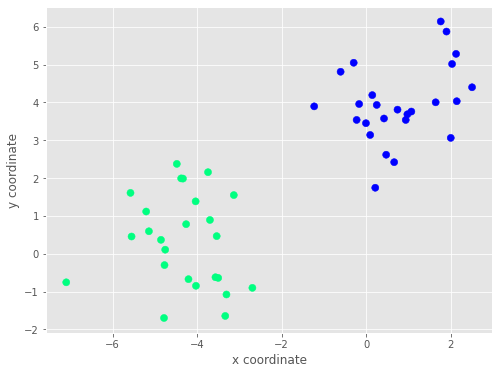

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=3, cluster_std=1.0)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

In [2]:
# Let's use a simple classifier first. We will use centroid classifier
from sklearn.neighbors import NearestCentroid

In [3]:
clf = NearestCentroid()
clf.fit(X, y)
means = clf.centroids_ # mean vectors for the two classes

In [4]:
means

array([[ 0.78014404,  3.95633348],
       [-4.3200894 ,  0.346919  ]])

In [5]:
means[:,0]

array([ 0.78014404, -4.3200894 ])

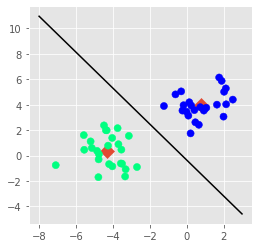

In [12]:
# We will now plot the bisector
# slope of the bisector is -(xmean2-xmean1)/(ymean2-ymean1)
# intercept is (ymean2+ymean1)/2 + (xmean2^2-xmean1^2)/2
m = -(means[1,0]-means[0,0])/(means[1,1]-means[0,1])
c = (means[1,1]+means[0,1])/2 + (means[1,0]**2-means[0,0]**2)/(2*(means[1,1]-means[0,1]))
xfit = np.linspace(-8, 3)
plt.figure(figsize=(4,4))
axes=plt.gca()
plt.plot(xfit, m * xfit + c, '-k')
plt.scatter(means[:,0],means[:,1],marker='D', s=100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
axes.set_aspect(1)
plt.show()

In [ ]:
# Many separating lines are possible to correctly divide the blue points from the green points
# In SVM,we fit a thick/fat line as the separating boundary. 
# We do that by identifying training points lying close to the boundary.
# The thickness of the fitted boundary is called "margin" and the SVM training
#consists of maximizing the margin

In [ ]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [ ]:
# Let's see the support vectors
model.support_vectors_

array([[ 0.21219196,  1.74387328],
       [-1.23229972,  3.89519459],
       [-3.13375771,  1.55028992]])

In [ ]:
def draw_svm(X, y):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y,s=50, cmap='winter')
    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
# Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
# Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                alpha=0.5, linestyles=['--', '-', '--'])
    axes.set_aspect(1)
    plt.show()

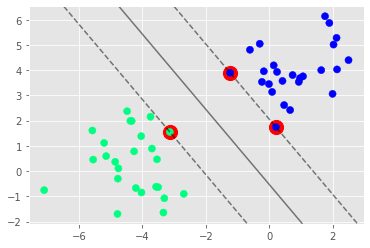

In [ ]:
plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='red')
draw_svm(X,y)
# The support vectors are shown in red

In [ ]:
# Let's change C; make it small
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

SVC(C=0.1, kernel='linear')

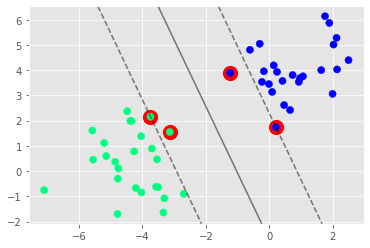

In [ ]:
plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='red')
draw_svm(X,y)

In [ ]:
# We see that we have now 4 support vectors. The parameter C is the regularization coefficient
# and it should be large to get a better solution. In a way, C decides the importance to 
# points away from the boundary

In [ ]:
# decision_function method returns the confidence score for a sample is proportional to the signed distance
# of that sample to the hyperplane. Let's calculate this for the samples (2,3) and (-4,-1)
model.decision_function([[2, 3],[-4, -1]])

array([-2.1915392 ,  1.76432054])

In [ ]:
model.predict([[2, 3],[-4, -1]])

array([0, 1])

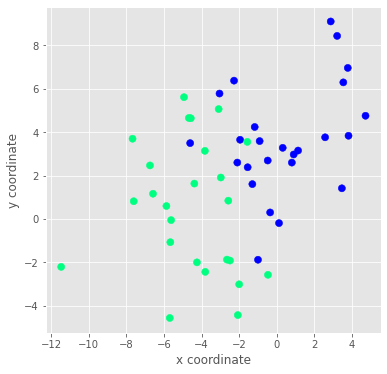

In [47]:
# Let's consider the case of soft margin.
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=3, cluster_std=2.5)
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

In [ ]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

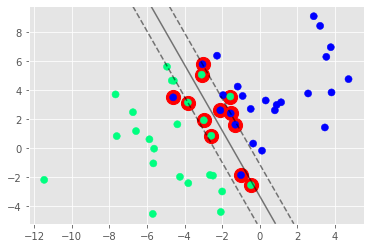

In [ ]:
plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='red')
draw_svm(X,y)

In [ ]:
# In this case, we have many support vectors
model.decision_function([[2, 3],[-4, -1]])

array([-4.92494511,  3.05722481])

In [ ]:
model.predict([[-4, 8],[-6, 8]])

array([0, 1])

In [ ]:
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

SVC(C=0.1, kernel='linear')

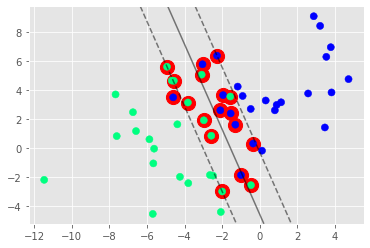

In [ ]:
plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='red')
draw_svm(X,y)

In [ ]:
# A smaller C value allows more support vectors and make the margin relatively large when
# data shows overlap.

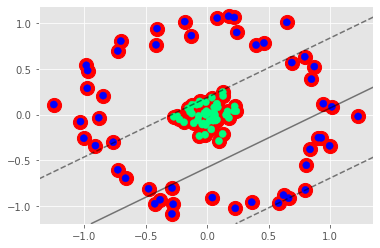

In [ ]:
# Now let's see the use of kernel functions for a nonlinear problem.
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
model = SVC(kernel='linear', C=1000)
model.fit(X, y)
plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='red')
draw_svm(X,y)

In [ ]:
# Clearly, no separation is possible.
# Let's map the input values using a kernel function, the radial basis function
r = np.exp(-(X ** 2).sum(1))

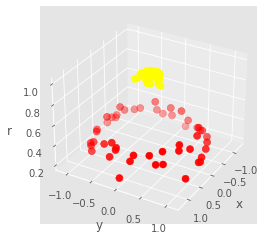

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
p = plot_3D()
plt.show()

In [ ]:
# The RBF mapping of the input has created two planes of r values to easily separate the data
# We perform such a mapping, known as the kernel trick by specifying a kernel function other than linear
model = SVC(kernel='rbf', C=1000)
model.fit(X, y)

SVC(C=1000)

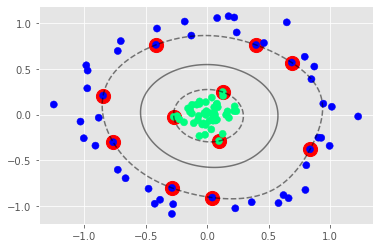

In [ ]:
plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='red')
draw_svm(X,y)

In [ ]:
# The choice of the kernel function is important. Let's use another kernel function
model = SVC(kernel='poly',coef0=1.0, C=1000)
model.fit(X, y)

SVC(C=1000, coef0=1.0, kernel='poly')

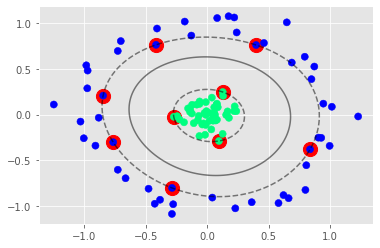

In [ ]:
plt.scatter(model.support_vectors_[:, 0], 
                model.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='red')
draw_svm(X,y)

### The polynomial kernel function has the following form
$ ((\gamma (xx^t)) +r)^d$, r is specified by coef0 and d by degree